# Závěrečný projekt - Nástoje a metody datové analytiky

Autor zpracování: Petra Skácelová

Zdroj dat: 
https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2Fd349f835e110df0a2fcdfb0d9503d7b1

<b>Hlavní otázka:
Jakým způsobem se změnilo vybavení informačními a komunikačními technologiemi mezi lety 2007 a 2020 v ČR?</b>

Otázky:
1. Jak se liší vývoj množství informačních a komunikačních technologií (osobní počítač, router, vysokorychlostní internet) v daných letech mezi jednotlivými kraji ČR?
2. O kolik se liší vlastnictví informačních a komunikačních technologií mezi jednotlivými příjmovými skupinami a jak se tato hodnota mění v čase?
3. Jsou procenta domácností vlastnící informační a komunikační technologii stejné bez ohledu na velikost obce, ze které pocházejí? Jak se tento trend mění v čase?
4. Zvyšuje se pravděpodobnost, že bude daná domácnost vlastnit informační či komunikační technologie, s počtem dospělých členů v domácnosti?
5. Jak se v čase proměňují procenta domácnostní vlastnící jednotlivé technologie v rámci celé ČR? 


<b>Poznámky k relevanci dat a jejich zpracování:</b>
- mám k dispozici pouze procenta domácností splňující dané kritérium, z metodiky případně ještě počet oslovených za dané roky a návratnost, nemám ale už data o rozložení do jednotlivých skupin a nakolik se liší mezi jednotlivými roky. Z tohoto důvodu si netroufám groupovat ani provádět jiné aritmetické operace s daty, omezuji se na filtrování a zobrazování (a nenapadlo mě moc jiných možností než prostý line chart - zbytek je matoucí nebo zkresluje
- dle dokumentace: "V případě údajů za kraje se jedná o aritmetické průměry za tři po sobě jdoucí roky, jako referenční rok je uveden prostřední." - co to znamená, moc netuším, každopádně je třeba se na ta data (Q1) dívat trošku s nadhledem
- někdy v prostředku dat došlo ke změně metodiky (místo osobní počítač, který byl patrně označením pro vše možné, se najednou uvádí více možností) - je celkem problém se s tím vypořádat a zároveň to nezkreslit

Úkoly pro mě: 
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.html

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from matplotlib.pyplot import figure

In [3]:
#Načtení dat
data_raw = pd.read_csv("data.csv")
data_raw.columns

Index(['idhod', 'hodnota', 'stapro_kod', 'typezar_cis', 'typezar_kod',
       'pnet_cis', 'pnet_kod', 'pocdospvdom_cis', 'pocdospvdom_kod',
       'pocdetivdom_cis', 'pocdetivdom_kod', 'velskupobce_cis',
       'velskupobce_kod', 'kvartilcpdom_cis', 'kvartilcpdom_kod', 'rok',
       'uzemi_cis', 'uzemi_kod', 'uzemi_txt', 'stapro_txt', 'typezar_txt',
       'pnet_text', 'pocdospvdom_txt', 'pocdetivdom_txt', 'velskupobce_txt',
       'kvartilcpdom_txt'],
      dtype='object')

In [4]:
#přejmenovávání sloupců
data_raw = data_raw.rename(columns={"uzemi_txt": "kraj", "kvartilcpdom_txt": "příjmová skupina", "typezar_txt": "typ zařízení", "velskupobce_txt": "velikost obce", "pocdospvdom_txt": "počet dospělých"})

## 1. otázka

<b>Jak se liší vývoj množství informačních a komunikačních technologií (osobní počítač, router, vysokorychlostní internet) v daných letech mezi jednotlivými kraji ČR?</b>

In [5]:
#vyfiltrování krajských dat (odstranění celorepublikových)
data_Q1 = data_raw[data_raw["uzemi_kod"] != 19]

In [6]:
def add_line(sloupec, hodnota, col, name_of_graph, data, leg, maker): 
    """Vykreslí/přidá linii do grafu na základě pravidel - ovlivnění barvy a legendy"""
    data_for_line = data[data[str(sloupec)] == hodnota]
    if leg and maker: 
        plt.plot(data_for_line.rok, data_for_line.hodnota, col, label=leg, marker=maker)
    elif leg: 
        plt.plot(data_for_line.rok, data_for_line.hodnota, col, label=leg)
    else: 
        plt.plot(data_for_line.rok, data_for_line.hodnota, col)

In [27]:
def make_pretty(tab, title):
    """Nedodělaný pokus o zlepšení tabulek"""
    tab.set_caption(title)
    return tab

#### Osobní počítače

In [8]:
#Filtrace
Q1_pc = data_Q1[data_Q1["typ zařízení"] == "Osobní počítač"][["hodnota", "kraj", "rok"]].sort_values(by="rok")

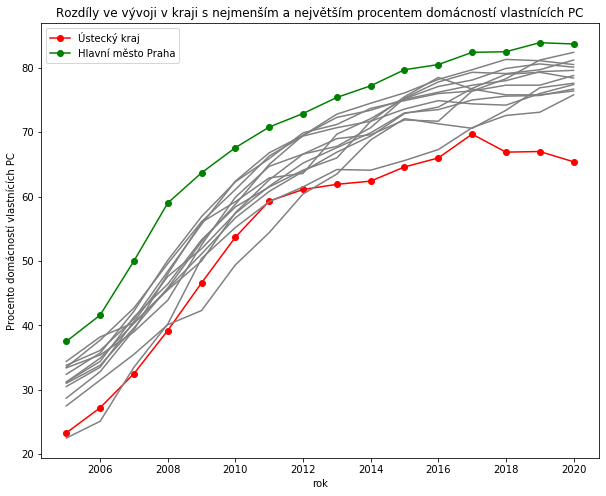

In [29]:
#graf zobrazující největší rozdíly
plt.figure(figsize=(10, 8))
fig_Q1_pc = plt.plot()

list_of_kraj = Q1_pc["kraj"].unique()
for kraj in list_of_kraj: 
    if kraj == "Hlavní město Praha": 
        col = "g"
        leg = "Hlavní město Praha"
        maker = "o"
    elif kraj == "Ústecký kraj":
        col = "r"
        leg = "Ústecký kraj"
        maker = "o"
    else: 
        col = "grey"
        leg = None
        maker = None
    add_line("kraj", kraj, col, fig_Q1_pc, Q1_pc, leg, maker)
    
plt.title("Rozdíly ve vývoji v kraji s nejmenším a největším procentem domácností vlastnících PC")
plt.xlabel("rok")
plt.ylabel("Procento domácností vlastnících PC")
plt.legend()
plt.show()

In [10]:
#interaktivní graf, nahoře ovládací prvky, odklikáváním v legendě se kraje dají zneviditelnit
fig_Q1_pc_int = px.line(Q1_pc, x="rok", y="hodnota", color="kraj", title="Vývoj procenta domácností vlastnících osobní počítač dle krajů")
fig_Q1_pc_int.update_layout(yaxis_title="hodnota v %")
fig_Q1_pc_int.show()

### Router

In [11]:
#Filtrace
Q1_wifi = data_Q1[data_Q1["typ zařízení"] == "Wi-Fi router"][["hodnota", "kraj", "rok"]].sort_values(by="rok")

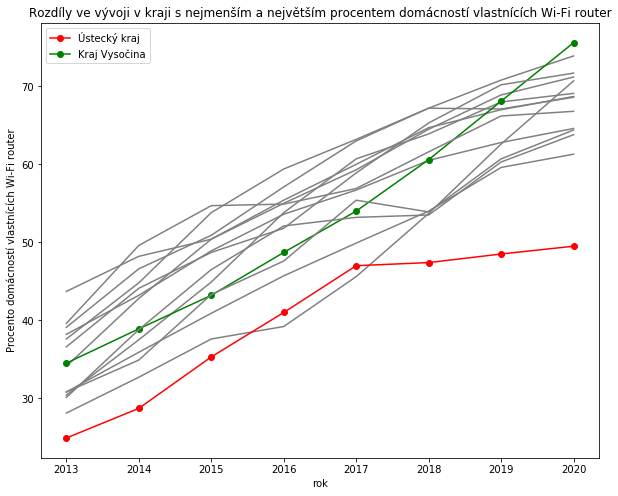

In [28]:
#graf zobrazující největší rozdíly
plt.figure(figsize=(10, 8))
fig_Q1_wifi = plt.plot()

list_of_kraj = Q1_pc["kraj"].unique()
for kraj in list_of_kraj: 
    if kraj == "Kraj Vysočina": 
        col = "g"
        leg = "Kraj Vysočina"
        maker = "o"
    elif kraj == "Ústecký kraj":
        col = "r"
        leg = "Ústecký kraj"
        maker = "o"
    else: 
        col = "grey"
        leg = None
        maker = None
    add_line("kraj", kraj, col, fig_Q1_wifi, Q1_wifi, leg, maker)
    
plt.title("Rozdíly ve vývoji v kraji s nejmenším a největším procentem domácností vlastnících Wi-Fi router")
plt.xlabel("rok")
plt.ylabel("Procento domácností vlastnících Wi-Fi router")
plt.legend()
plt.show()

In [13]:
#interaktivní graf, nahoře ovládací prvky, odklikáváním v legendě se kraje dají zneviditelnit
fig_Q1_wifi_int = px.line(Q1_wifi, x="rok", y="hodnota", color="kraj", title="Vývoj procenta domácností vlastnících Wi-Fi router dle krajů")
fig_Q1_wifi_int.update_layout(yaxis_title="hodnota v %")
fig_Q1_wifi_int.show()

### Vysokorychlostní připojení

In [14]:
#Filtrace
Q1_pripojeni = data_Q1[data_Q1["pnet_text"] == "Vysokorychlostní připojení"][["hodnota", "kraj", "rok"]].sort_values(by="rok")

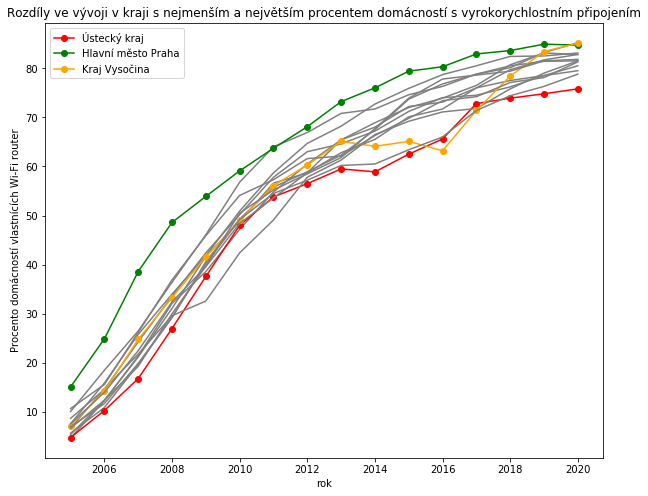

In [30]:
#graf zobrazující největší rozdíly
plt.figure(figsize=(10, 8))
fig_Q1_pripojeni = plt.plot()

list_of_kraj = Q1_pripojeni["kraj"].unique()
for kraj in list_of_kraj: 
    if kraj == "Kraj Vysočina": 
        col = "orange"
        leg = "Kraj Vysočina"
        maker = "o"
    elif kraj == "Ústecký kraj":
        col = "r"
        leg = "Ústecký kraj"
        maker = "o"
    elif kraj == "Hlavní město Praha": 
        col = "g"
        leg = "Hlavní město Praha"
        maker = "o"
    else: 
        col = "grey"
        leg = None
        maker = None
    add_line("kraj", kraj, col, fig_Q1_pripojeni, Q1_pripojeni, leg, maker)
    
plt.title("Rozdíly ve vývoji v kraji s nejmenším a největším procentem domácností s vyrokorychlostním připojením")
plt.xlabel("rok")
plt.ylabel("Procento domácností vlastnících Wi-Fi router")
plt.legend()
plt.show()

In [16]:
#interaktivní graf, nahoře ovládací prvky, odklikáváním v legendě se kraje dají zneviditelnit
fig_Q1_pripojeni_int = px.line(Q1_pripojeni, x="rok", y="hodnota", color="kraj", title="Vývoj procenta domácností s vysokorychlostním připojením dle krajů")
fig_Q1_pripojeni_int.update_layout(yaxis_title="hodnota v %")
fig_Q1_pripojeni_int.show()

<i>(Mimochodem, díky tomuto jsem objevila framefork dash a asi se s ní budu následujících pár týdnů učit, protože mi to teď zrovna fáákt nejde)</i>

## 2. otázka

<b>O kolik procent se liší vlastnictví informačních a komunikačních technologií mezi jednotlivými příjmovými skupinami a jak se tato hodnota mění v čase?</b>

Mezi informační a komunikační technologie jsou započítány kategorie - Osobní počítač, Stolní počítal, Tablet, Notebook(Laptop) (postupně došlo ke změně klasifikace)
- vyřazeny byly routery, je to jiná kategorie (u které úplně nerozumím metodice)

In [17]:
#vybrání dat s údaji o příjmové skupině
data_Q2 = data_raw[data_raw["příjmová skupina"].notna()]
#vybrání dat o vlastnictví elektronického zařízení mimo routerů
data_Q2 = data_Q2[(data_Q2["stapro_txt"] == "Domácností majících elektronické zařízení") & (data_Q2["typ zařízení"]!= "Wi-Fi router")]

In [18]:
#kontingenční tabulka s danými údaji (každý údaj v tabulce jen jednou, nedochází tedy k žádné operaci)
Q2_data_pivot = data_Q2[["příjmová skupina", "rok", "typ zařízení", "hodnota"]]
Q2_pivot = pd.pivot_table(Q2_data_pivot, values="hodnota", index=["rok", "typ zařízení"], columns="příjmová skupina")
Q2_pivot[["první (nejnižší) kvartil", "druhý kvartil", "třetí kvartil", "čtvrtý (nejvyšší) kvartil"]]

příjmová skupina        první (nejnižší) kvartil  druhý kvartil  \
rok  typ zařízení                                                 
2009 Osobní počítač                         16.5           45.2   
2010 Osobní počítač                         21.2           46.8   
2011 Osobní počítač                         26.5           50.3   
2012 Osobní počítač                         26.2           52.8   
2013 Osobní počítač                         30.4           52.4   
2014 Osobní počítač                         32.7           57.5   
2015 Osobní počítač                         34.3           57.2   
2016 Notebook (laptop)                      26.8           44.4   
     Osobní počítač                         38.3           59.1   
     Stolní počítač                         19.5           34.8   
     Tablet                                  6.8           11.9   
2017 Notebook (laptop)                      24.5           45.6   
     Osobní počítač                         41.5           70.0   
     Stolní počítač                         19.2           32.1   
     Tablet                                  6.2           13.5   
2018 Notebook (laptop)                      27.2           53.7   
     Osobní počítač                         44.1           76.4   
     Stolní počítač                         19.4           32.6   
     Tablet                                 10.4           24.4   
2019 Notebook (laptop)                      28.1           52.0   
     Osobní počítač                         46.3           73.0   
     Stolní počítač                         17.9           29.3   
     Tablet                                 10.6           20.6   
2020 Notebook (laptop)                      27.8           55.5   
     Osobní počítač                         44.0           77.2   
     Stolní počítač                         17.0           32.1   
     Tablet                                 10.1           24.6   
2021 Notebook (laptop)                      28.3           59.1   
     Osobní počítač                         44.6           78.0   
     Stolní počítač                         15.8           29.5   
     Tablet                                  9.1           25.0   

příjmová skupina        třetí kvartil  čtvrtý (nejvyšší) kvartil  
rok  typ zařízení                                                 
2009 Osobní počítač              77.4                       91.3  
2010 Osobní počítač              75.1                       91.8  
2011 Osobní počítač              80.4                       93.7  
2012 Osobní počítač              86.0                       94.8  
2013 Osobní počítač              87.6                       95.5  
2014 Osobní počítač              87.2                       97.4  
2015 Osobní počítač              85.7                       96.7  
2016 Notebook (laptop)           68.9                       87.7  
     Osobní počítač              86.9                       97.6  
     Stolní počítač              52.3                       60.8  
     Tablet                      26.9                       40.6  
2017 Notebook (laptop)           73.3                       85.0  
     Osobní počítač              93.7                       98.5  
     Stolní počítač              42.6                       57.2  
     Tablet                      29.8                       45.0  
2018 Notebook (laptop)           76.8                       87.6  
     Osobní počítač              94.7                       98.2  
     Stolní počítač              47.1                       60.3  
     Tablet                      41.1                       53.4  
2019 Notebook (laptop)           76.3                       91.4  
     Osobní počítač              93.4                       98.6  
     Stolní počítač              40.3                       52.0  
     Tablet                      38.8                       55.0  
2020 Notebook (laptop)           80.0                       89.9  
     Osobní počítač              94.1         

In [19]:
#Podmíněná proměnná pro řazení
conditions_Q2 = [
    (data_Q2["příjmová skupina"] == "první (nejnižší) kvartil"), 
    (data_Q2["příjmová skupina"] == "druhý kvartil"), 
    (data_Q2["příjmová skupina"] == "třetí kvartil"), 
    (data_Q2["příjmová skupina"] == "čtvrtý (nejvyšší) kvartil")
]
values_Q2 = [x for x in range(4)]

data_Q2["sorting"] = np.select(conditions_Q2, values_Q2)


#Grafy pro vývoj v čase
sorted_data_Q2 = data_Q2.sort_values(by=["rok","sorting"])
for zarizeni in sorted_data_Q2["typ zařízení"].unique():
    data = sorted_data_Q2[sorted_data_Q2["typ zařízení"] == zarizeni]
    title = "Vývoj vlastnictví " + str(zarizeni) + " v čase vrámci jednotlivých příjmových skupin"
    fig_Q2 = px.line(data, x="rok", y="hodnota", color="příjmová skupina", title=title, markers=True)
    fig_Q2.update_layout(yaxis_title="hodnota v %")
    fig_Q2.show()

### 3. otázka

<b>Jsou procenta domácností vlastnící informační a komunikační technologii stejné bez ohledu na velikost obce, ze které pocházejí? Jak se tento trend mění v čase?</b>

In [20]:
data_Q3 = data_raw[(data_raw["velikost obce"].notna()) & (data_raw["typ zařízení"].notna()) & (data_raw["typ zařízení"] != "Wi-Fi router")]

In [21]:
Q3_data_pivot = data_Q3[["velikost obce", "rok", "typ zařízení", "hodnota"]]
Q3_pivot = pd.pivot_table(Q3_data_pivot, values="hodnota", index=["rok", "typ zařízení"], columns="velikost obce")
Q3_pivot[["do 1999", "2000 – 9999", "10000 – 49999", "50000 a více"]]

velikost obce           do 1999  2000 – 9999  10000 – 49999  50000 a více
rok  typ zařízení                                                        
2009 Osobní počítač        51.4         50.4           51.8          60.5
2010 Osobní počítač        55.9         57.7           58.7          63.3
2011 Osobní počítač        63.0         61.8           63.3          68.8
2012 Osobní počítač        65.2         66.3           66.2          70.3
2013 Osobní počítač        66.6         65.1           69.8          70.2
2014 Osobní počítač        67.9         71.4           72.7          76.6
2015 Osobní počítač        71.5         71.4           71.5          76.5
2016 Notebook (laptop)     53.8         54.1           57.5          54.3
     Osobní počítač        72.3         75.0           75.5          78.7
     Stolní počítač        40.3         39.8           35.3          44.1
     Tablet                20.1         21.1           17.1          21.8
2017 Notebook (laptop)     58.7         56.3           54.9          59.5
     Osobní počítač        76.6         75.6           73.3          78.6
     Stolní počítač        39.2         38.2           36.2          38.5
     Tablet                22.2         24.9           21.5          26.2
2018 Notebook (laptop)     61.3         59.2           59.9          64.0
     Osobní počítač        76.8         76.4           77.6          81.7
     Stolní počítač        40.9         39.1           34.4          43.3
     Tablet                31.4         29.8           30.3          36.4
2019 Notebook (laptop)     60.5         61.7           57.1          66.5
     Osobní počítač        74.5         77.8           77.2          81.2
     Stolní počítač        32.4         36.1           31.6          38.4
     Tablet                27.6         28.4           27.6          38.9
2020 Notebook (laptop)     63.3         62.0           62.0          65.2
     Osobní počítač        78.8         79.3           77.7          78.9
     Stolní počítač        39.0         38.4           35.2          37.3
     Tablet                30.1         30.4           32.4          34.5
2021 Notebook (laptop)     60.8         62.7           64.5          69.8
     Osobní počítač        75.3         79.2           78.5          82.3
     Stolní počítač        34.5         34.2           31.9          36.8
     Tablet                27.0         29.6           31.1          36.6

In [22]:
#podmíněná proměnná pro řazení
conditions_Q3 = [
    (data_Q3["velikost obce"] == "do 1999"),
    (data_Q3["velikost obce"] == "2000 – 9999"),
    (data_Q3["velikost obce"] == "10000 – 49999"),
    (data_Q3["velikost obce"] == "50000 a více")
]

values_Q3 = [x for x in range(4)]
data_Q3["sorting"] = np.select(conditions_Q3, values_Q3)

#Grafy pro vývoj v čase
sorted_data_Q3 = data_Q3.sort_values(by=["rok", "sorting"])
for zarizeni in sorted_data_Q3["typ zařízení"].unique():
    data = sorted_data_Q3[sorted_data_Q3["typ zařízení"] == zarizeni]
    title = "Vývoj vlastnictví " + str(zarizeni) + " v čase v rámci jednotlivých příjmových skupin"
    fig_Q3 = px.line(data, x="rok", y="hodnota", color="velikost obce", title=title, markers=True)
    fig_Q3.update_layout(yaxis_title="hodnota v %")
    fig_Q3.show()

<ipython-input-22-3383984eac85>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 4. otázka

<b> Zvyšuje se pravděpodobnost, že bude daná domácnost vlastnit informační či komunikační technologie, s počtem dospělých členů v domácnosti?</b>

In [23]:
data_Q4 = data_raw[(data_raw["počet dospělých"].notna()) & (data_raw["typ zařízení"].notna()) & (data_raw["typ zařízení"] != "Wi-Fi router")]

In [24]:
Q4_data_pivot = data_Q4[["počet dospělých", "rok", "typ zařízení", "hodnota"]]
Q4_pivot = pd.pivot_table(Q4_data_pivot, values="hodnota", index=["rok", "typ zařízení"], columns="počet dospělých")
Q4_pivot

počet dospělých             1      2  3 a více
rok  typ zařízení                             
2007 Osobní počítač     27.95  46.95     64.25
2008 Osobní počítač     41.00  54.65     75.75
2009 Osobní počítač     42.10  61.90     83.35
2010 Osobní počítač     49.60  64.65     85.45
2011 Osobní počítač     56.45  69.00     87.50
2012 Osobní počítač     57.25  71.95     90.55
2013 Osobní počítač     58.15  74.80     90.15
2014 Osobní počítač     61.75  80.00     92.25
2015 Osobní počítač     67.20  80.35     92.15
2016 Notebook (laptop)  47.80  56.70     76.30
     Osobní počítač     69.80  82.45     93.65
     Stolní počítač     19.40  40.85     58.15
     Tablet             12.40  22.40     33.45
2017 Notebook (laptop)  43.90  63.50     77.85
     Osobní počítač     64.55  83.65     95.10
     Stolní počítač     25.35  36.05     55.95
     Tablet             24.50  25.90     40.90
2018 Notebook (laptop)  51.50  65.05     81.65
     Osobní počítač     66.60  85.20     94.65
     Stolní počítač     21.20  37.50     56.65
     Tablet             29.90  36.15     49.80
2019 Notebook (laptop)  48.30  67.35     85.40
     Osobní počítač     66.70  84.25     94.75
     Stolní počítač     19.70  36.70     49.85
     Tablet             26.10  38.35     46.20
2020 Notebook (laptop)  56.80  69.35     85.95
     Osobní počítač     72.15  85.85     95.20
     Stolní počítač     25.00  38.55     56.55
     Tablet             27.80  39.50     47.80
2021 Notebook (laptop)  56.45  73.00     84.50
     Osobní počítač     71.60  86.65     96.30
     Stolní počítač     21.40  37.50     52.30
     Tablet             27.20  39.90     46.75

### 5. otázka

<b>Jak se v čase proměňují procenta domácnostní vlastnící jednotlivé technologie v rámci celé ČR?</b>
(Předpokládám, že údaj uvedený bez konkretizace počtu dospělých, dětí, příjmové skupiny a velikosti obce odpovídá průměru za celek.)

In [25]:
#filtrace území ČR a přítomnost informace o typu zařízení
data_Q5 = data_raw[(data_raw["uzemi_kod"] == 19) & (data_raw["typ zařízení"].notna())]
#filtrace detailních informací
data_Q5 = data_Q5[(data_Q5["počet dospělých"].isna()) & (data_Q5["pocdetivdom_txt"].isna()) & (data_Q5["velikost obce"].isna()) & (data_Q5["příjmová skupina"].isna())]
data_Q5 = data_Q5.sort_values(by="rok")

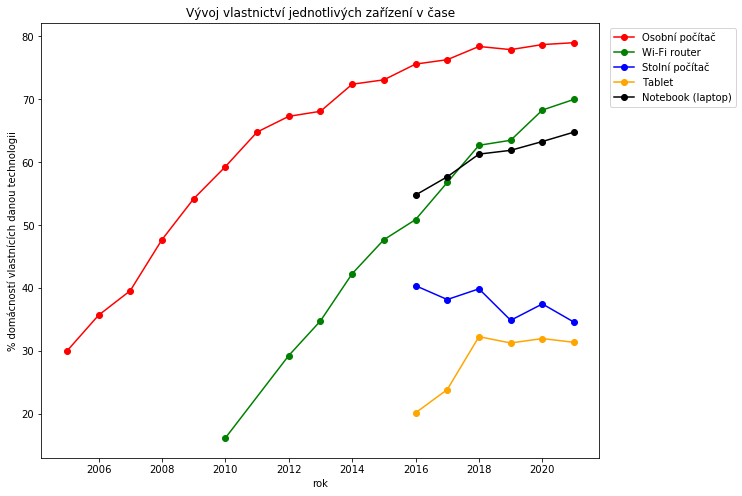

In [26]:
plt.figure(figsize=(10, 8))
fig_Q5 = plt.plot()
lst = ["r", "g", "b", "orange", "black"]


for number, zarizeni in enumerate(data_Q5["typ zařízení"].unique()):
    add_line("typ zařízení", zarizeni, lst[number], fig_Q5, data_Q5, zarizeni, "o")
    
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title("Vývoj vlastnictví jednotlivých zařízení v čase")
plt.xlabel("rok")
plt.ylabel("% domácností vlastnících danou technologii")
plt.show()